<a href="https://colab.research.google.com/github/Drishya24-lab/ML-Projects/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import necessary libraries
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [ ]:
!pip install xgboost
from xgboost import XGBRegressor

In [ ]:

zip_file_path=('/content/drive/MyDrive/archive (2).zip')
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/')
data=pd.read_csv('/content/drive/MyDrive/House_Price_dataset.csv')

In [ ]:
print("First 2 rows:\n", data.head(2))
print("\nDataset Info:\n",data.info())
print("\nDataset Shape:", data.shape)
print("\nStatistical Summary:\n", data.describe())
print("\nColumns in Dataset:\n", data.columns)
print("\nData Types:\n", data.dtypes)

First 2 rows:
    property_id  location_id  \
0       237062         3325   
1       346905         3236   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat  10000000   
1  https://www.zameen.com/Property/e_11_2_service...          Flat   6900000   

  location       city      province_name   latitude  longitude  baths  \
0     G-10  Islamabad  Islamabad Capital  33.679890  73.012640      2   
1     E-11  Islamabad  Islamabad Capital  33.700993  72.971492      3   

        area   purpose  bedrooms  date_added agency agent Area Type  \
0    4 Marla  For Sale         2  02-04-2019    NaN   NaN     Marla   
1  5.6 Marla  For Sale         3  05-04-2019    NaN   NaN     Marla   

   Area Size Area Category  
0        4.0     0-5 Marla  
1        5.6    5-10 Marla  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column       

In [ ]:
print(data.isnull())
print(data.isnull().sum())

        property_id  location_id  page_url  property_type  price  location  \
0             False        False     False          False  False     False   
1             False        False     False          False  False     False   
2             False        False     False          False  False     False   
3             False        False     False          False  False     False   
4             False        False     False          False  False     False   
...             ...          ...       ...            ...    ...       ...   
168441        False        False     False          False  False     False   
168442        False        False     False          False  False     False   
168443        False        False     False          False  False     False   
168444        False        False     False          False  False     False   
168445        False        False     False          False  False     False   

         city  province_name  latitude  longitude  baths   area

In [ ]:
#drop irrelevent columns
data=data.drop(['page_url','property_id','agency','agent','location_id','latitude','longitude','location','area','date_added','Area Category','Area Type'],axis=1)

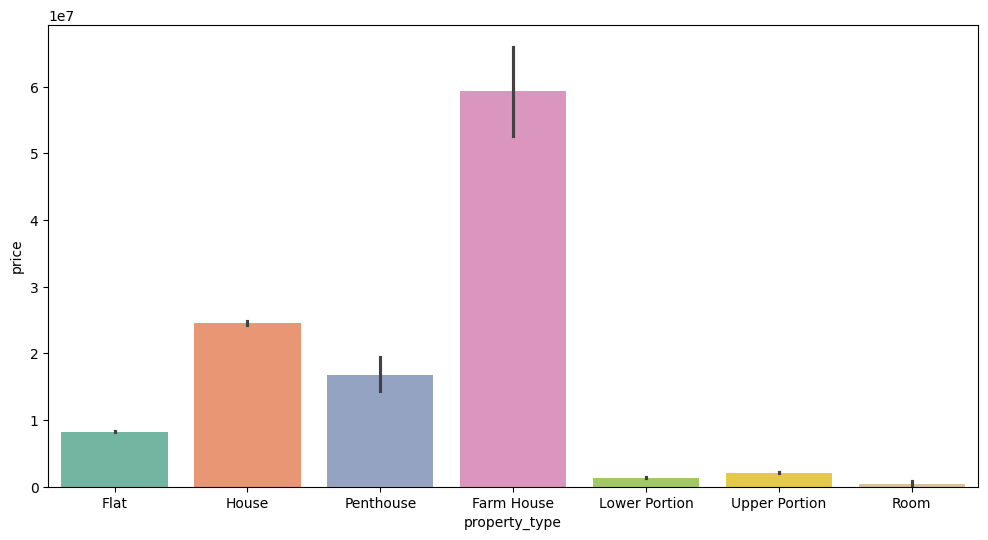

In [ ]:
# Property type vs Price
plt.figure(figsize=(12,6))
sns.barplot(x='property_type',y='price',hue='property_type',data=data,palette='Set2',legend=False)
plt.show()

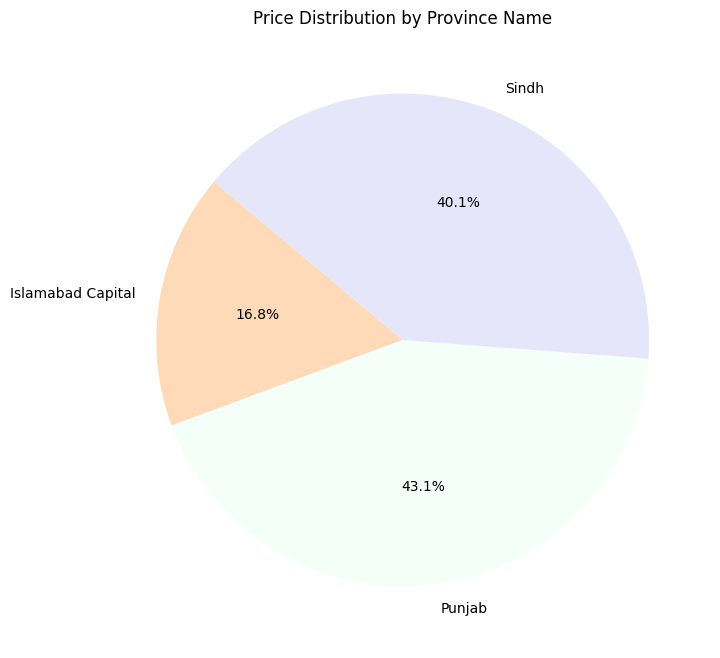

In [ ]:
# Price Distribution by Province
province_grouped = data.groupby('province_name')['price'].sum()
colors = ['peachpuff', 'mintcream', 'lavender']


plt.figure(figsize=(8, 8))
plt.pie(province_grouped, labels=province_grouped.index, colors=colors, startangle=140, autopct='%1.1f%%')
plt.title('Price Distribution by Province Name')
plt.show()


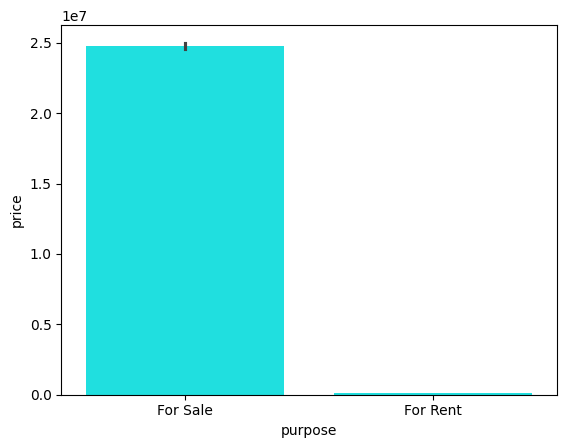

In [ ]:
# Purpose vs Price
sns.barplot(x='purpose',y='price',data=data,color='cyan')
plt.show()

In [ ]:
# Encode Categorical Variables
categorical_columns=['city','property_type','province_name','purpose']
ohe=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoded_data=ohe.fit_transform(data[categorical_columns])
encoded_df=pd.DataFrame(encoded_data,columns=ohe.get_feature_names_out(categorical_columns))
data=pd.concat([data,encoded_df],axis=1)
data=data.drop(categorical_columns,axis=1)

In [ ]:
# Scale Numerical Columns
num_col=['price','Area Size','bedrooms','baths']
for col in num_col:
  standard_scaler=StandardScaler()
  data[[col]]=standard_scaler.fit_transform(data[[col]])

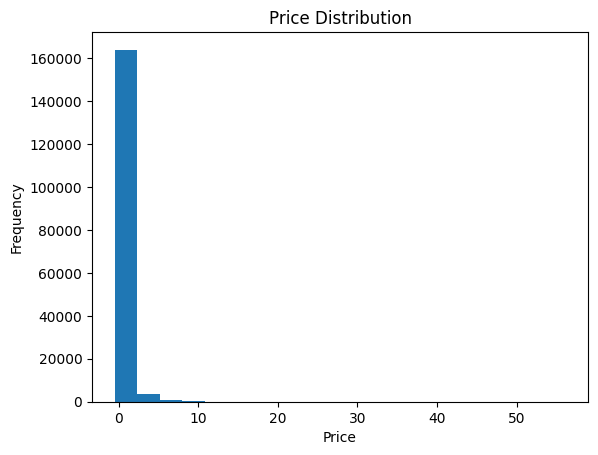

In [ ]:
# Price Distribution Histogram
plt.hist(data['price'],bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

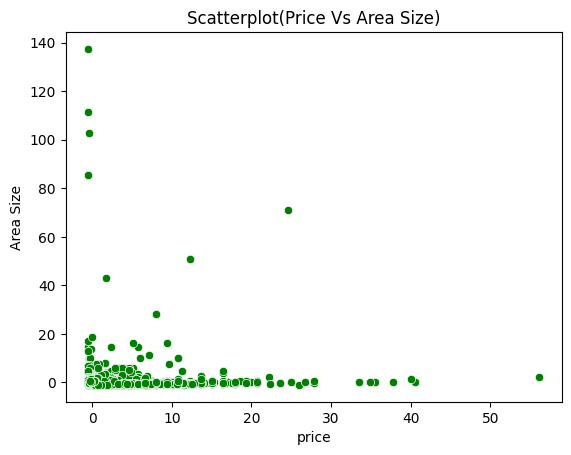

In [ ]:
# Scatterplot Price vs Area Size
sns.scatterplot(x='price',y='Area Size',data=data,color='green')
plt.title('Scatterplot(Price Vs Area Size)')
plt.show()

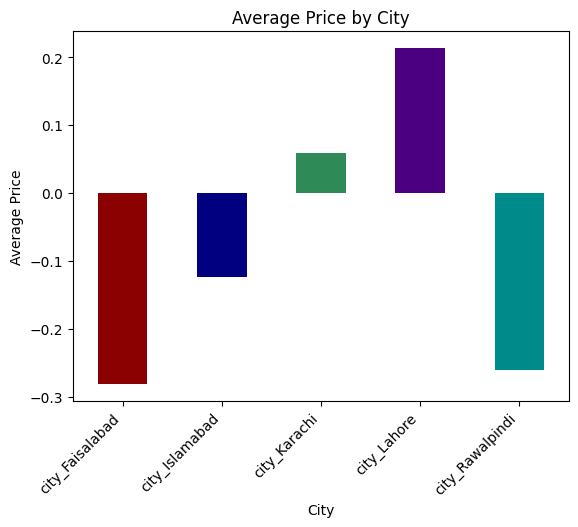

In [ ]:
city_idx=data[['city_Faisalabad', 'city_Islamabad', 'city_Karachi', 'city_Lahore', 'city_Rawalpindi']].idxmax(axis=1)
avg_city_price=data.groupby(city_idx)['price'].mean()
color=['darkred','Navy','SeaGreen','Indigo','DarkCyan']
avg_city_price.plot(kind='bar',color=color)
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Data Splitting for Model Training
X=data.drop('price',axis=1)
y=data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:

# Function to Evaluate Models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-Squared: {r2}\n")

In [31]:

# Model Training and Evaluation
evaluate_model(LinearRegression(), X_train, X_test, y_train, y_test)
evaluate_model(DecisionTreeRegressor(random_state=42), X_train, X_test, y_train, y_test)
evaluate_model(RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test)
evaluate_model(GradientBoostingRegressor(random_state=42), X_train, X_test, y_train, y_test)
evaluate_model(AdaBoostRegressor(random_state=42), X_train, X_test, y_train, y_test)
evaluate_model(XGBRegressor(random_state=42), X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Absolute Error: 0.42425473521097173
Mean Squared Error: 0.746073319095222
R-Squared: 0.19749622326312566

Model: DecisionTreeRegressor
Mean Absolute Error: 0.169924340466039
Mean Squared Error: 0.4617610344261956
R-Squared: 0.5033129256969819

Model: RandomForestRegressor
Mean Absolute Error: 0.16605198871434446
Mean Squared Error: 0.3903910131064675
R-Squared: 0.5800811335781205

Model: GradientBoostingRegressor
Mean Absolute Error: 0.24336181549121993
Mean Squared Error: 0.46415250537256725
R-Squared: 0.5007405719921916

Model: AdaBoostRegressor
Mean Absolute Error: 0.6629082420771073
Mean Squared Error: 1.3536627612968872
R-Squared: -0.45604922541154447

Model: XGBRegressor
Mean Absolute Error: 0.18679224462513255
Mean Squared Error: 0.38187858351040244
R-Squared: 0.5892374145028068



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [1, 1.5, 2],  # L2 regularization
}
# Initialize XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_params)

# Evaluate the best model on test data
y_pred = best_xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned XGBRegressor:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 1.0}
Tuned XGBRegressor:
Mean Absolute Error: 0.17841783631324432
Mean Squared Error: 0.3730125534748223
R-Squared: 0.5987740410060091


In [30]:


best_params={'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300,
             'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 1.0}

X_full=pd.concat([X_train,X_test])
y_full=pd.concat([y_train,y_test])

final_model=XGBRegressor(**best_params,random_state=42)
final_model.fit(X_full,y_full)
joblib.dump(final_model,'/content/drive/MyDrive/final_model.pkl')
print("Final XGBoost model trained and saved successfully!")

Final XGBoost model trained and saved successfully!
